## Question 1
(DMD Exercise 2.22) This question begins with the text "A large retail company has stores at two locations in a city..." To solve this question, you would have to use the formula in DMD Section 2.11.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.stats as st
from scipy.stats import poisson, binom,rv_discrete,uniform,norm
import scipy.optimize
import matplotlib.mlab as mlab

largeStoreSaleMean = 147.8
largeStoreSaleStdev = 51.0
discountSalesMean = 63.2
discountSalesStdev = 37.0

corrLargeDiscount = 0.7

largeStoreUmbrellaPrice = 17
discountUmbrellaPrice = 9

meanRevenue = largeStoreUmbrellaPrice*largeStoreSaleMean+discountUmbrellaPrice*discountSalesMean
varRevenue = largeStoreSaleStdev**2*largeStoreUmbrellaPrice**2 + discountSalesStdev**2*discountUmbrellaPrice**2+2*discountUmbrellaPrice*largeStoreUmbrellaPrice*largeStoreSaleStdev*discountSalesStdev*corrLargeDiscount
stdevRevenue = varRevenue**0.5
print("The Mean Revenue from both stores is ${:.2f}".format(meanRevenue))
print("The Variance of Revenues from both stores is {:.2f}".format(varRevenue))
print("The Standard Deviation of Revenues from both stores is ${:.2f}".format(stdevRevenue))


The Mean Revenue from both stores is $3081.40
The Variance of Revenues from both stores is 1266773.40
The Standard Deviation of Revenues from both stores is $1125.51


## Question 2
(DMD Exercise 2.25) This question begins with the text "Suppose a fraction 5% of the microchips produced by a leading microchip manufacturer are defective."

In [3]:
pDefective = 0.05
pNotDefective = 1-pDefective
numShipment = 10
dist = binom(numShipment,pDefective)
dist1 = binom (numShipment,pNotDefective)
numChipNotDefective = 10
print("a. The probability of all {} micro-chips being non defective is {:.2f}".format(numChipNotDefective,dist1.pmf(numChipNotDefective)))
pAcceptsGivenDefective = 0.1
pAcceptsGivenNotDefective = 1.00
pAcceptsAndDefective = pAcceptsGivenDefective*pDefective
pAcceptsAndNotDefective = pAcceptsGivenNotDefective*pNotDefective
pAccepts = pAcceptsAndDefective+pAcceptsAndNotDefective
pNotDefectiveGivenAccepts = pAcceptsAndNotDefective/pAccepts
print("b. The probability of the inspector accepting a particular micro-chip is {:.3f}".format(pAccepts))
dist2 = binom(numShipment,pAccepts)
print("c. The probability that the inspector accepts 9 out of 10 micro-chips is {:.3f}".format(dist2.pmf(9)))
print("d. The probability that the chip is not defective given that the inspector accepts it, is {:.3f}".format(pNotDefectiveGivenAccepts))
dist3 = binom(numShipment,pNotDefectiveGivenAccepts)
print("e. The probability that all 10 chips are not defective given that the inspector accepts them all, is {:.3f}".format(dist3.pmf(10)))

a. The probability of all 10 micro-chips being non defective is 0.60
b. The probability of the inspector accepting a particular micro-chip is 0.955
c. The probability that the inspector accepts 9 out of 10 micro-chips is 0.297
d. The probability that the chip is not defective given that the inspector accepts it, is 0.995
e. The probability that all 10 chips are not defective given that the inspector accepts them all, is 0.949


## Question 3
(DMD Exercise 2.27) This question begins with the text "In this exercise we examine the effects of overbooking in the airline industry."


In [4]:

numSeats = 10
numSoldTickets = 11
pNotShowing = 0.20
pShowing = 1-pNotShowing
dist1=binom(numSoldTickets,pShowing)
print("a. The probability that at most 5 of the {} persons who bought the tickets show up is {:.3f}".format(numSoldTickets,dist1.cdf(5)))
print("b. Probability that exactly 10 people show up is {:.3f}".format(dist1.pmf(10)))
ticketPrice = 1200
overbookCost = 3000
revenue = []
prob = []
for i in range(0,numSoldTickets+1):
    prob.append(dist1.pmf(i))
    if i<11:
        revenue.append(ticketPrice*numSeats)
    else:
        revenue.append(ticketPrice*numSeats-overbookCost*(i-numSeats))

expectedRevenue = np.multiply(revenue,prob)        

print("c. The expected revenue from the ticket sale if 11 passengers show up is {:.2f}".format(sum(expectedRevenue)))

revenue1 = revenue[0:len(revenue)-1]
prob1 = prob[0:len(prob)-1]


expectedRevenue1 = np.multiply(revenue1,prob1)
print("d. The expected revenue from the ticket sale if 10 passengers show up is {:.2f}".format(sum(expectedRevenue1)))

print("e. Yes, the fact that prople often travel in groups of 2 or more would affect our assumption that prob. of a person \n not showing up is independent of the other passenger's behavior. Now we shall have to consider groups of the ticket sales. \n For eg. if the 3rd and 4th person booked together, then prob. of them both not showing up is not 20%*20% (it may be considered 20% but certainly not 20%*20%) as both pasenger's behavior is dependent as they booked together.")

a. The probability that at most 5 of the 11 persons who bought the tickets show up is 0.012
b. Probability that exactly 10 people show up is 0.236
c. The expected revenue from the ticket sale if 11 passengers show up is 11742.30
d. The expected revenue from the ticket sale if 10 passengers show up is 10969.21
e. Yes, the fact that prople often travel in groups of 2 or more would affect our assumption that prob. of a person 
 not showing up is independent of the other passenger's behavior. Now we shall have to consider groups of the ticket sales. 
 For eg. if the 3rd and 4th person booked together, then prob. of them both not showing up is not 20%*20% (it may be considered 20% but certainly not 20%*20%) as both pasenger's behavior is dependent as they booked together.


In [37]:
len(revenue)
revenue
revenue1 = revenue[0:10]
revenue1

[12000, 12000, 12000, 12000, 12000, 12000, 12000, 12000, 12000, 12000]

## Question 4 
This question asks you to illustrate the Central Limit Theorem using Python plots.

a) (Coding DMD Example 3.11 in Section 3.7) Create python code that plots the 3 plots in Figure 3.14.

b) (Coding DMD Example 3.12 in Section 3.7) Create python code that plots the 4 plots in Figure 3.15.

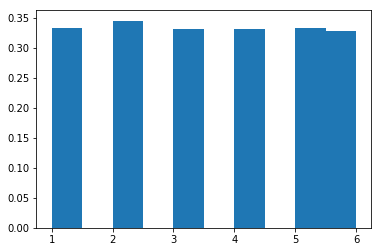

In [30]:
# part a
outcome = [1,2,3,4,5,6]
prob=[1/6,1/6,1/6,1/6,1/6,1/6]
meanDist123 = sum(np.multiply(outcome,prob))
##find out the array of squares of diff from mean
var = []
for i in outcome:
    var.append((i-meanDist123)**2)
var = np.hstack(var) 
varDist123 = sum(np.multiply(prob,var))
sdDist123 = varDist123**0.5
dist1 = rv_discrete(values=(outcome,prob))
dist2 = rv_discrete(values=(outcome,prob))
dist3 = rv_discrete(values=(outcome,prob))
samples = dist1.rvs(size=10000)
plt.hist(samples,density=True)
plt.show()

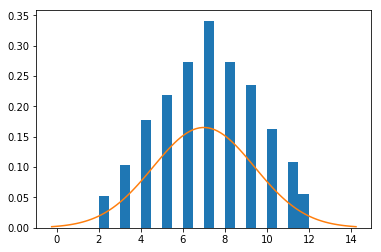

In [33]:
tot=[]
for i in range(10000):
    rv1 = dist1.rvs(size=1)
    rv2=dist2.rvs(size=1)
    rv=rv1+rv2
    tot.append(rv)
total = np.hstack(tot)
plt.hist(total,bins = 20,density=True)
mu=meanDist123*2
sigma = (2*varDist123)**0.5
x1=np.linspace(mu-3*sigma,mu+3*sigma,100)
plt.plot(x1,mlab.normpdf(x1,mu,sigma))
plt.show()

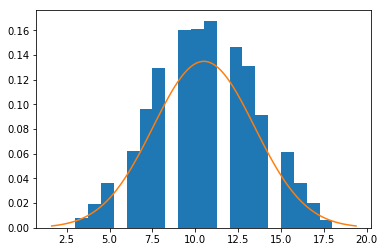

In [35]:
tot=[]
for i in range(10000):
    rv1 = dist1.rvs(size=1)
    rv2=dist2.rvs(size=1)
    rv3=dist3.rvs(size=1)
    rv=rv1+rv2+rv3
    tot.append(rv)
total = np.hstack(tot)
plt.hist(total,bins = 20,density=True)
mu=meanDist123*3
sigma = (3*varDist123)**0.5
x1=np.linspace(mu-3*sigma,mu+3*sigma,100)
plt.plot(x1,mlab.normpdf(x1,mu,sigma))
plt.show()

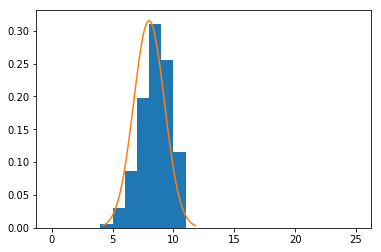

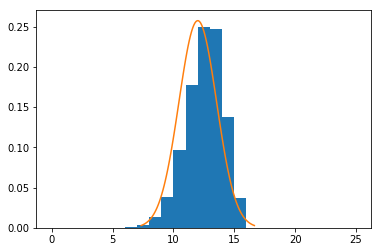

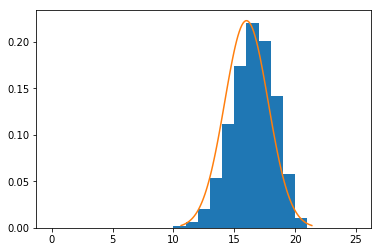

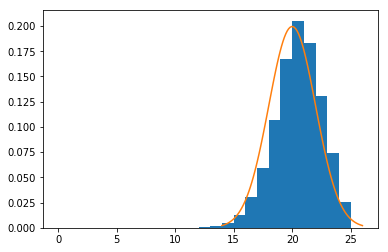

In [114]:
## b part
x = [10,15,20,25]
for i in x:
    dist1 = binom(i,0.8)
    samples = dist1.rvs(size = 5000)
    plt.hist(samples,bins = range(26),density=True)
    mu=i*0.8
    sigma = (i*0.8*0.2)**0.5
    x1=np.linspace(mu-3*sigma,mu+3*sigma,100)
    plt.plot(x1,mlab.normpdf(x1,mu,sigma))
    plt.show()
#x=range(26)
#plt.vlines(x,0,dist.pmf(x))

## Question 5
(DMD Exercise 3.2) This question begins with the text "The men's 100 meter sprint at the 1996 Olympic Games..."

In [68]:
donovanDist = uniform(9.75,0.20)
frankieDist = uniform(9.75,0.20)
atoDist = uniform(9.75,0.20)
previousRecord = 9.86
print("a. Probability that Donovan Bailey would beat the previous record of {} seconds is {:.2f}".format(previousRecord,1-donovanDist.cdf(previousRecord)))
print("b. The probability that the winning time would beat the previous record of {} seconds is {:.2f}. We assume that winning times  are independent and as only 1 will win and all have identical probability distributions so the required prob can be computed from any 1 distribution".format(previousRecord,1-donovanDist.cdf(previousRecord)))
print("c. We have assumed that the running times are independent for each athlete, however, this assumption is not valid as any athlete might increase/decrease his speed based on the other athlete's running speed/time as this is a live competition")

a. Probability that Donovan Bailey would beat the previous record of 9.86 seconds is 0.45
b. The probability that the winning time would beat the previous record of 9.86 seconds is 0.45. We assume that winning times  are independent and as only 1 will win and all have identical probability distributions so the required prob can be computed from any 1 distribution
c. We have assumed that the running times are independent for each athlete, however, this assumption is not valid as any athlete might increase/decrease his speed based on the other athlete's running speed/time as this is a live competition


## Question 6
(DMD Exercise 3.6) This question begins with the text "Winter lasts from December 21 through March 21..."

In [76]:
bostonMeanTemp = 32.5
bostonStdevTemp = 1.59
nycMeanTemp = 35.4
nycStdevTemp = 2.05

bostonWinterdist = norm(bostonMeanTemp,bostonStdevTemp)
nycWinterdist  = norm(nycMeanTemp,nycStdevTemp)
thresholdTemp = 32.0
print("a. The prob that the average winter temp in Boston will be above {} is {:.2f}".format(thresholdTemp,1-bostonWinterdist.cdf(thresholdTemp)))
print("b. To find the probability that Boston temp is greater than NYC, we define another normally distributed RV which is the difference between Boston & NYC temperatures")
diffMean = bostonMeanTemp-nycMeanTemp
diffStdev = (bostonStdevTemp**2+nycStdevTemp**2)**0.5
diffDist = norm(diffMean,diffStdev)
print("The prob that average temp in Boston is greater than average temp in NYC is {:.2f}".format(1-diffDist.cdf(0)))

print("c. Independence assumption is not valid as the temperatures in both the cities would be highly correlated as they are both located nearby and their climate is affected by the same environmental effects")

a. The prob that the average winter temp in Boston will be above 32.0 is 0.62
b. To find the probability that Boston temp is greater than NYC, we define another normally distributed RV which is the difference between Boston & NYC temperatures
The prob that average temp in Boston is greater than average temp in NYC is 0.13
c. Independence assumption is not valid as the temperatures in both the cities would be highly correlated as they are both located nearby and their climate is affected by the same environmental effects


## Question 7
(DMD Exercise 3.12) This question begins with the text "A portfolio manager believes that tomorrow's foreign exchange rate of German marks per U.S. dollar will be Normally distributed..."

In [82]:
meanGermanMark = 2.03
stdevGermanMark = 0.08
germanMarkDist = norm(2.03,0.08)
print("a. The probability that tomorrow's rate would be above 2.08 is {:.2f}".format(1-germanMarkDist.cdf(2.08)))
print("b. The probability that tomorrow's rate would be below 1.85 is {:.2f}".format(germanMarkDist.cdf(1.85)))
print("c. The probability that tomorrow's rate would be between 2.00 and 2.20 is {:.2f}".format(germanMarkDist.cdf(2.20)-germanMarkDist.cdf(2.00)))

a. The probability that tomorrow's rate would be above 2.08 is 0.27
b. The probability that tomorrow's rate would be below 1.85 is 0.01
c. The probability that tomorrow's rate would be between 2.00 and 2.20 is 0.63


## Question 8
(DMD Exercise 3.18) This question begins with the text "In 1996, after an extensive investigation by the Consumer Product Safety Commission..."

In [106]:
pElectricalDefect = 0.30
numCars = 2000
print("a. We need to model the RV: Car has electrical wiring problem or not as a binomial RV. For this, the assumption that eletrical wiring problem in all cars is independent of each other. However, this assumption is not satisfied as the cars may be part of the same manufacturing batch and as such would have been subjected to the same processes which would result in all of them having electrical wiring problems thus making the RV dependent")
carDist = binom(numCars,pElectricalDefect)
print("b. The prob that 5 or fewer cars have electrical wiring problem is {:.4f} which is very low".format(carDist.cdf(5)))
pDefectsSample = 5/2000
expectedDefectedCars = pDefectsSample*numCars
sdDefectedCars = (numCars*pDefectsSample*(1-pDefectsSample))**0.5
populationDist = norm(expectedDefectedCars,sdDefectedCars)
populationValue = .30*43000
print("c. Chance that in the population 30% of the cars are defective given manufacturer claims are true is {:.4f}".format(1-populationDist.cdf(populationValue)))

a. We need to model the RV: Car has electrical wiring problem or not as a binomial RV. For this, the assumption that eletrical wiring problem in all cars is independent of each other. However, this assumption is not satisfied as the cars may be part of the same manufacturing batch and as such would have been subjected to the same processes which would result in all of them having electrical wiring problems thus making the RV dependent
b. The prob that 5 or fewer cars have electrical wiring problem is 0.0000 which is very low
c. Chance that in the population 30% of the cars are defective given manufacturer claims are true is 0.0000


## Question 9
Choose one continuous probability distribution and one discrete probability distribution in the `scipy.stats` library that we didn't discuss in class. See the scipy.stats documentation: https://docs.scipy.org/doc/scipy/reference/stats.html

For each of the two distributions, read the documentation above and Wikipedia the distribution. Then describe one example in your life or in your future career in which this distribution may be used to model an uncertainty. (If you can't find an example, choose another distribution.) Illustrate each application using reasonable parameters you choose, and plot the PMF or PDF of the distribution as well as a histogram of 100 samples. Write one sentence to summarize an insight from looking at the histogram or the PMF/PDF that may be helpful for the application you chose.

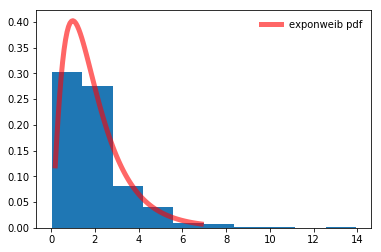

In [38]:
##First Distribution
## Weibull Continuous Distribution
##Failure Rate in 
from scipy.stats import exponweib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
a, c = 2.89, 0.9
mean, var, skew, kurt = exponweib.stats(a, c, moments='mvsk')
x = np.linspace(exponweib.ppf(0.01, a, c),exponweib.ppf(0.99, a, c), 100)
ax.plot(x, exponweib.pdf(x, a, c),'r-', lw=5, alpha=0.6, label='exponweib pdf')
#rv = exponweib(a, c)
#ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
r = exponweib.rvs(a, c, size=1000)
ax.hist(r, normed=True, histtype='stepfilled')
ax.legend(loc='best', frameon=False)
plt.show()
##Second Distribution
